In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cleaning_functions import *

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline 
from imblearn import FunctionSampler

from skopt import BayesSearchCV

import warnings
warnings.filterwarnings("ignore")

OLD MODELS

In [56]:
#Day 2 Model 1
new_model1 = xgb.XGBClassifier(scale_pos_weight=60, max_depth=11,learning_rate=0.075, n_estimators=110, objective='binary:logistic',
                         booster='gbtree', subsample=0.2, eval_metric='auc',colsample_bytree=0.9,
                         colsample_bynode=0.65, max_delta_step=10, gamma=0.025, reg_alpha=0.1, reg_lambda=0)
new_model1.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.65, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.025, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.075, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=10,
              max_depth=11, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=110, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [100]:
#Day 2 Model 2
new_model2 = xgb.XGBClassifier(scale_pos_weight=60, max_depth=11,learning_rate=0.1, n_estimators=120, objective='binary:logistic',
                         booster='gbtree', subsample=0.18, eval_metric='auc',colsample_bytree=0.9,
                         colsample_bynode=1.0, max_delta_step=3, gamma=0.5, reg_alpha=3.2, reg_lambda=0.4)

new_model2.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1.0, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=3,
              max_depth=11, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [105]:
#Day 2 Model 3
new_model3 = xgb.XGBClassifier(scale_pos_weight=60, max_depth=12,learning_rate=0.1, n_estimators=180, objective='binary:logistic',
                         booster='gbtree', subsample=0.185, eval_metric='auc',colsample_bytree=0.6,
                         colsample_bynode=0.9, max_delta_step=5, gamma=0.35, reg_alpha=0.8, reg_lambda=0.3)

new_model3.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.9, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.35, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=5,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

PREDICTION AND SUBMISSION OF REAL TEST DATA

In [14]:
#Import files
test = pd.read_csv('../cleaned_data/test_cleaned.csv')
X_TEST = test.drop(['individualnumber', 'category_number', 'gender', 'city_code', 'is_large_city'], axis=1).copy()

In [15]:
#Use model to make predictions
model = model
y_predict = model.predict(X_TEST)
submission = pd.DataFrame()
submission['individualnumber'] = test['individualnumber']
submission['response'] = y_predict
submission.to_csv('./submissions/submission_day3_1.csv', index=False)

NameError: name 'new_model4' is not defined

PARAMETER TUNING

In [16]:
train = pd.read_csv('../organized_data/train_organized.csv')
X = train.drop(["individualnumber", "response", "category_number", "level1_relevant_category_volume_per_day", "level2_relevant_category_volume_per_day", "level3_relevant_category_volume_per_day", "level4_relevant_category_volume_per_day", "level1_relevant_category_quantity_per_day", "level2_relevant_category_quantity_per_day", "level3_relevant_category_quantity_per_day", "level4_relevant_category_quantity_per_day", "discount_per_day", "total_money_spent_per_day", "gender", "city_code", "is_large_city"], axis=1).copy()
y = train['response'].copy()
print('#0/#1 is {}'.format((len(y)-sum(y))/sum(y)))

#0/#1 is 61.751196172248804


In [18]:
def pipeline_prepare(_X_train, _y_train):
    train = _X_train.copy()
    train['response'] = _y_train
    train = prepare_train(train=train, _anomalies=0.01, _anomalies_lower=0.008)
    y = train['response']
    X = train.drop(['response'], axis=1).copy()
    return X, y

transformer = FunctionSampler(func=pipeline_prepare, validate=False)

xgb0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc')

pipeline = Pipeline([('transformer', transformer), ('xgb', xgb0)])

In [ ]:
#TUNING ROUND 1
param_grid = {'xgb__gamma':[0.35, 0.4, 0.45],
              'xgb__learning_rate':[0.075, 0.1, 0.125],
              'xgb__max_delta_step':[0, 5, 10],
              'xgb__max_depth':[9, 10, 11, 12],
              'xgb__n_estimators':[90, 100, 110, 120, 150, 180, 200],
              'xgb__subsample':[0.175, 0.2],
              'xgb__colsample_bynode':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'xgb__colsample_bytree':[0.6, 0.7, 0.8, 0.9],
              'xgb__reg_alpha':[0, 0.1, 0.2, 0.4, 0.8],
              'xgb__reg_lambda':[0, 0.1, 0.2, 0.3, 0.4]}

gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]
bcvj = int(gcvj)

model = BayesSearchCV(estimator=pipeline, search_spaces=param_grid, n_iter=100, scoring='f1', cv=5, return_train_score=True, verbose=3)
model.fit(X_train, y_train)

df = pd.DataFrame(model.cv_results_)

test_pred = model.predict(X_test)

print('Test\n')
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test,test_pred))
print('f05:{}'.format(metrics.fbeta_score(y_test, test_pred, beta=0.5)))

bp = model.best_params_

In [16]:
sorted_df = df.sort_values(by='rank_test_score')
sorted_df.to_csv('./parameter_search/stats_round1.csv',index=False)
bp

OrderedDict([('colsample_bynode', 0.9),
             ('colsample_bytree', 0.6),
             ('gamma', 0.35),
             ('learning_rate', 0.1),
             ('max_delta_step', 5),
             ('max_depth', 12),
             ('n_estimators', 180),
             ('reg_alpha', 0.8),
             ('reg_lambda', 0.3),
             ('subsample', 0.18503578676524662)])

RAPID TESTING

In [12]:
train = pd.read_csv('../organized_data/train_organized.csv')
X = train.drop(["individualnumber", "response", "category_number", "level1_relevant_category_volume_per_day", "level2_relevant_category_volume_per_day", "level3_relevant_category_volume_per_day", "level4_relevant_category_volume_per_day", "level1_relevant_category_quantity_per_day", "level2_relevant_category_quantity_per_day", "level3_relevant_category_quantity_per_day", "level4_relevant_category_quantity_per_day", "discount_per_day", "total_money_spent_per_day", "gender", "city_code", "is_large_city"], axis=1).copy()
y = train['response'].copy()

In [43]:
model = xgb.XGBClassifier(scale_pos_weight=62, max_depth=12,learning_rate=0.1, n_estimators=150, objective='binary:logistic',
                         booster='gbtree', subsample=0.2, eval_metric='auc',colsample_bytree=0.2,
                         colsample_bynode=.5, max_delta_step=5, gamma=0.5, reg_alpha=3.2, reg_lambda=0.4)


model.fit(X, y, verbose=2)

[0]	validation_0-auc:0.83828
[2]	validation_0-auc:0.84882
[4]	validation_0-auc:0.85557
[6]	validation_0-auc:0.86826
[8]	validation_0-auc:0.87890
[10]	validation_0-auc:0.89029
[12]	validation_0-auc:0.89050
[14]	validation_0-auc:0.89365
[16]	validation_0-auc:0.89707
[18]	validation_0-auc:0.89501
[20]	validation_0-auc:0.88655
[22]	validation_0-auc:0.89413
[24]	validation_0-auc:0.89179
[26]	validation_0-auc:0.88947
[28]	validation_0-auc:0.89869
[30]	validation_0-auc:0.90034
[32]	validation_0-auc:0.89988
[34]	validation_0-auc:0.90226
[36]	validation_0-auc:0.90019
[38]	validation_0-auc:0.90246
[40]	validation_0-auc:0.90566
[42]	validation_0-auc:0.90410
[44]	validation_0-auc:0.90267
[46]	validation_0-auc:0.90216
[48]	validation_0-auc:0.90777
[50]	validation_0-auc:0.90887
[52]	validation_0-auc:0.90920
[54]	validation_0-auc:0.90613
[56]	validation_0-auc:0.90333
[58]	validation_0-auc:0.90538
[60]	validation_0-auc:0.90117
[62]	validation_0-auc:0.90153
[64]	validation_0-auc:0.90503
[66]	validation

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.5, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=5,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [44]:
train_pred = model.predict(X)
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test,test_pred))
print(metrics.fbeta_score(y_test, test_pred, beta=0.5))

Test

[[3142   85]
 [  29   23]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3227
           1       0.21      0.44      0.29        52

    accuracy                           0.97      3279
   macro avg       0.60      0.71      0.63      3279
weighted avg       0.98      0.97      0.97      3279

0.23760330578512398
Train

[[9341  171]
 [   2  155]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9512
           1       0.48      0.99      0.64       157

    accuracy                           0.98      9669
   macro avg       0.74      0.98      0.82      9669
weighted avg       0.99      0.98      0.99      9669

0.5304585900068446


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

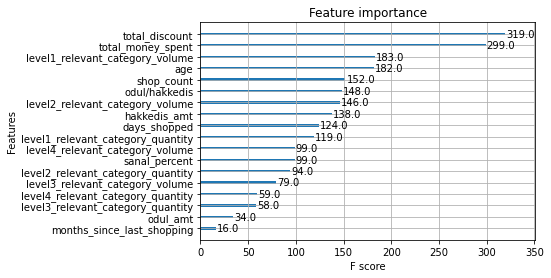

In [160]:
xgb.plot_importance(model)

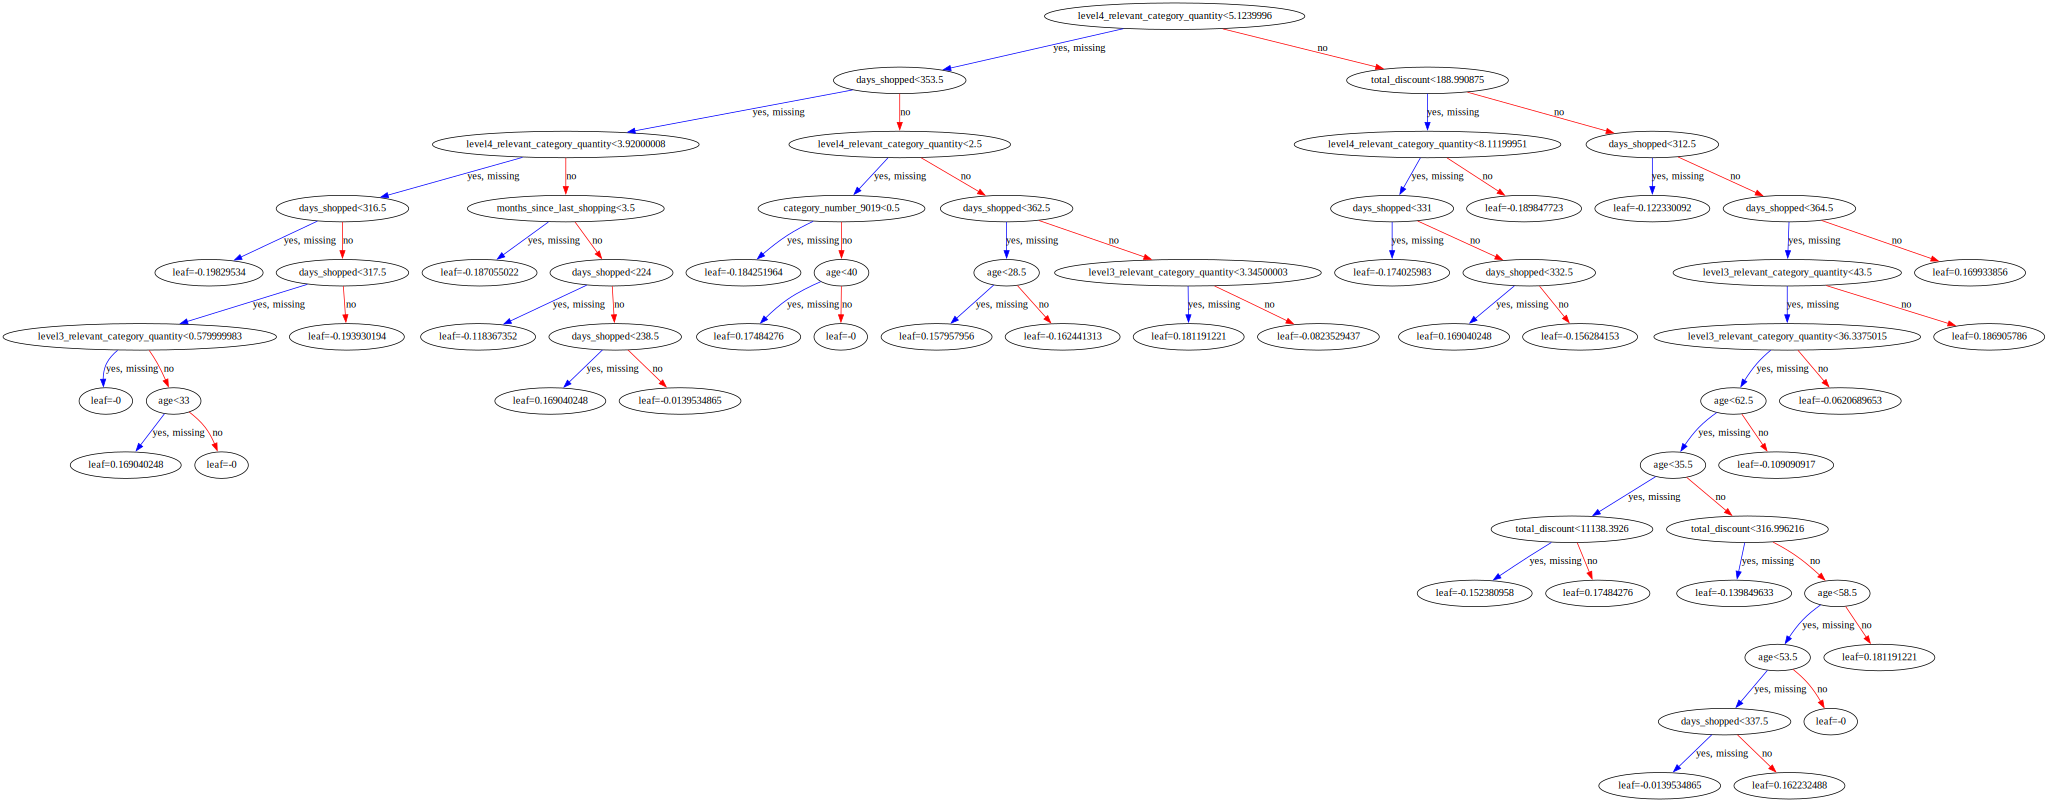

In [45]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
xgb.to_graphviz(model)